In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

### Simulate some AR process

In [2]:
def generate_ar_process(lags, coefs, length):
    # cast coefs to numpy array
    coefs = np.array(coefs)
    
    # initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        # get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        # get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statsistic: %f' % result[0])
    print('p-values: %f' % result[1])

The null hypothesis of the ADF test is that there is an Unit root i.e. alpha >= 1, which also means that the series is non-stationary. 

* If p-value is less than 0.05 then we say it is stationary
* If p-value is not less than 0.05 we say it is non-stationary

## AR(1) process

### Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

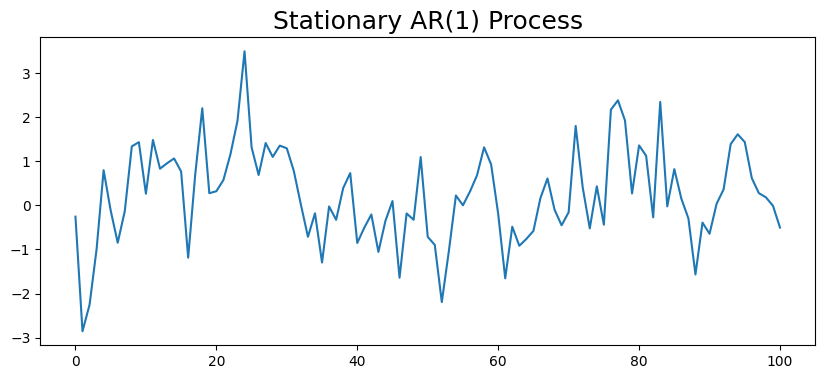

In [4]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize = (10, 4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize = 18)

In [5]:
perform_adf_test(ar_1_process)

ADF Statsistic: -5.649835
p-values: 0.000001


So, here p-value is far less than 0.05 which means it is stationary

### Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

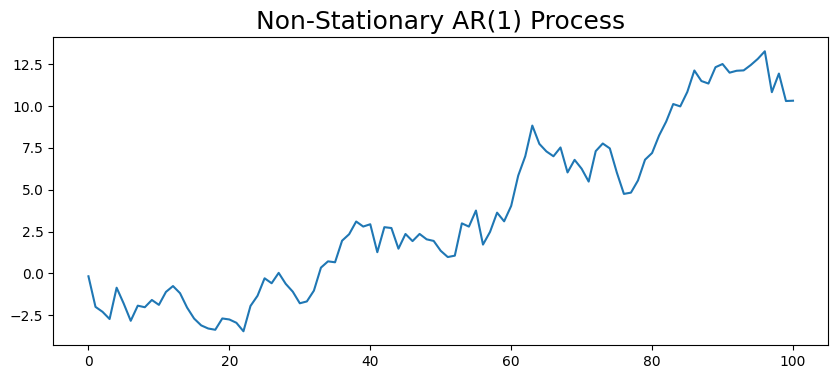

In [6]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize = (10, 4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize = 18)

In [7]:
perform_adf_test(ar_1_process_unit_root)

ADF Statsistic: -0.561346
p-values: 0.879479


The p-value is way higher than 0.05 and hence there is a clear evidence of Unit root and the series is non-stationary

## AR(2) Process

### Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

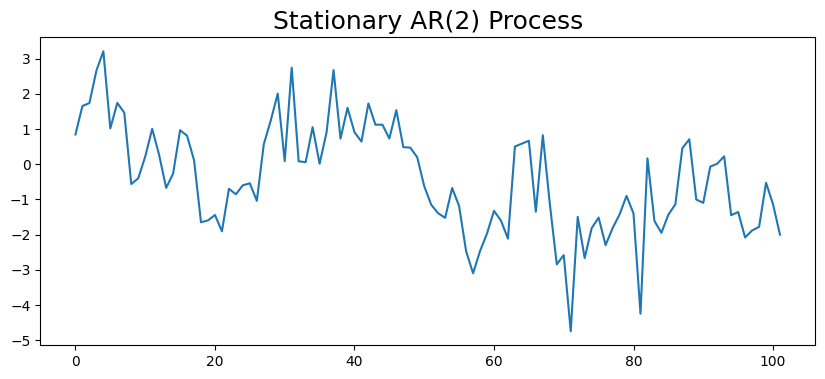

In [9]:
# here phi1 is 0.5, phi2 is 0.3 .. both some up to 0.8 so it is stationary
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [10]:
perform_adf_test(ar_2_process)

ADF Statsistic: -3.063494
p-values: 0.029375


It is stationary as it has p-value less than 0.05

### Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

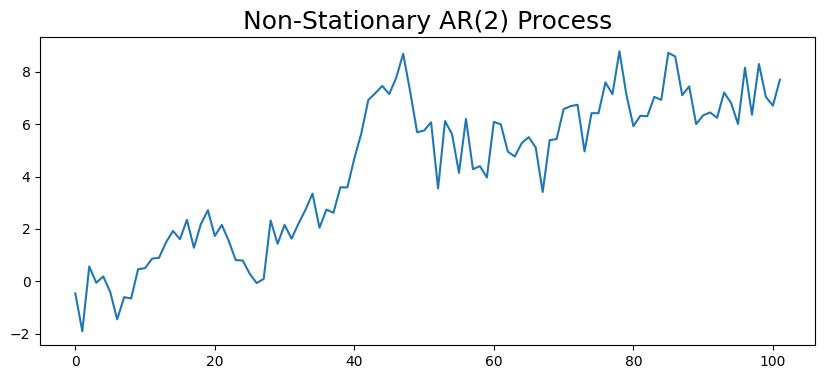

In [11]:
# the phi1 + phi2 sum up to 1, so it is not stationary
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [12]:
perform_adf_test(ar_2_process_unit_root)

ADF Statsistic: -1.935018
p-values: 0.315771


We get a clear indication from the p-value that it is non-stationary